In [32]:
#Import the libraries that we are going to use for the analysis:
import pandas as pd
import numpy as np
import scipy 
from statsforecast import StatsForecast
from statsforecast.models import HistoricAverage
from statsforecast.models import Naive
from statsforecast.models import SeasonalNaive
from statsforecast.models import RandomWalkWithDrift
from statsforecast.models import ARIMA
import matplotlib.pyplot as plt 

In [59]:
pd.read_csv(f'./data/{stock}_daily_adjusted.csv', 
                          header=0, index_col=0, parse_dates=[0], thousands=',')

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient
Date,,,,,,,,
2024-11-14,179.750,180.445,176.03,177.35,177.350000,17925763,0.0,1.0
2024-11-13,182.150,182.615,180.12,180.49,180.490000,13969709,0.0,1.0
2024-11-12,181.380,184.025,180.99,183.32,183.320000,14065845,0.0,1.0
2024-11-11,180.070,182.085,179.99,181.97,181.970000,12503422,0.0,1.0
2024-11-08,182.000,182.350,179.57,179.86,179.860000,15021549,0.0,1.0
...,...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,567.00,28.280112,146700,0.0,1.0
2014-04-01,558.710,568.450,558.71,567.16,28.288093,7900,0.0,1.0
2014-03-31,566.890,567.000,556.93,556.97,27.779849,10800,0.0,1.0


In [141]:
stock='TSLA'
stock_data=pd.read_csv(f'./data/{stock}_daily_adjusted.csv', 
                          header=0, index_col=0, parse_dates=[0], thousands=',')
stock_data = stock_data.sort_index(ascending=True)
# stock_data.reset_index(inplace=True)
stock_data.head()

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient
Date,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,1.592667,18766300,0.0,1.0
2010-06-30,25.79,30.4192,23.30,23.83,1.588667,17187100,0.0,1.0
2010-07-01,25.00,25.9200,20.27,21.96,1.464000,8218800,0.0,1.0
2010-07-02,23.00,23.1000,18.71,19.20,1.280000,5139800,0.0,1.0
2010-07-06,20.00,20.0000,15.83,16.11,1.074000,6866900,0.0,1.0


In [142]:
stock_data['lag 1 Adjusted Close']=stock_data['Adjusted Close'].shift(1)
stock_data['lag 1 Volume']=stock_data['Volume'].shift(1)
stock_data.dropna(inplace=True)
stock_data.head()

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,lag 1 Adjusted Close,lag 1 Volume
Date,,,,,,,,,,
2010-06-30,25.79,30.4192,23.30,23.83,1.588667,17187100,0.0,1.0,1.592667,18766300.0
2010-07-01,25.00,25.9200,20.27,21.96,1.464000,8218800,0.0,1.0,1.588667,17187100.0
2010-07-02,23.00,23.1000,18.71,19.20,1.280000,5139800,0.0,1.0,1.464000,8218800.0
2010-07-06,20.00,20.0000,15.83,16.11,1.074000,6866900,0.0,1.0,1.280000,5139800.0
2010-07-07,16.40,16.6300,14.98,15.80,1.053333,6921700,0.0,1.0,1.074000,6866900.0


In [143]:
stock_data['Gain Ratio Close']=(stock_data['Adjusted Close']-stock_data['lag 1 Adjusted Close'])/stock_data['lag 1 Adjusted Close']
stock_data['Gain Ratio Volume']=(stock_data['Volume']-stock_data['lag 1 Volume'])/(stock_data['lag 1 Volume'])
stock_data['Gain Ratio Combined']=stock_data['Gain Ratio Close']*stock_data['Gain Ratio Volume']
stock_data.tail()

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,lag 1 Adjusted Close,lag 1 Volume,Gain Ratio Close,Gain Ratio Volume,Gain Ratio Combined
Date,,,,,,,,,,,,,
2024-11-08,299.14,328.7100,297.66,321.22,321.22,204782763,0.0,1.0,296.91,117309232.0,0.081877,0.745666,0.061053
2024-11-11,346.30,358.6400,336.00,350.00,350.00,210521625,0.0,1.0,321.22,204782763.0,0.089596,0.028024,0.002511
2024-11-12,342.74,345.8400,323.31,328.49,328.49,155726016,0.0,1.0,350.00,210521625.0,-0.061457,-0.260285,0.015996
2024-11-13,335.85,344.5999,322.50,330.24,330.24,125405599,0.0,1.0,328.49,155726016.0,0.005327,-0.194704,-0.001037
2024-11-14,327.69,329.9800,310.37,311.18,311.18,117753376,0.0,1.0,330.24,125405599.0,-0.057716,-0.061020,0.003522


In [145]:
train_filter = stock_data.index <= "2024-10-31"
train_data = stock_data[train_filter]

# Filter the year of interest:
test_filter = stock_data.index > "2023-10-31"
test_data = stock_data[test_filter]

# Create arrays with Close values: 
y_train_data = train_data["Adjusted Close"].values
y_test_data = test_data["Adjusted Close"].values

In [146]:
test_data.head()

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,lag 1 Adjusted Close,lag 1 Volume,Gain Ratio Close,Gain Ratio Volume,Gain Ratio Combined
Date,,,,,,,,,,,,,
2023-11-01,204.04,205.9900,197.85,205.66,205.66,121661656,0.0,1.0,200.84,118068273.0,0.023999,0.030435,0.000730
2023-11-02,212.97,219.2000,211.45,218.51,218.51,125987621,0.0,1.0,205.66,121661656.0,0.062482,0.035557,0.002222
2023-11-03,221.15,226.3701,218.40,219.96,219.96,119534790,0.0,1.0,218.51,125987621.0,0.006636,-0.051218,-0.000340
2023-11-06,223.98,226.3200,215.00,219.27,219.27,117335820,0.0,1.0,219.96,119534790.0,-0.003137,-0.018396,0.000058
2023-11-07,219.98,223.1200,215.72,222.18,222.18,116900130,0.0,1.0,219.27,117335820.0,0.013271,-0.003713,-0.000049


In [134]:
print(y_train_data.shape,y_test_data.shape) 

(2668,) (262,)


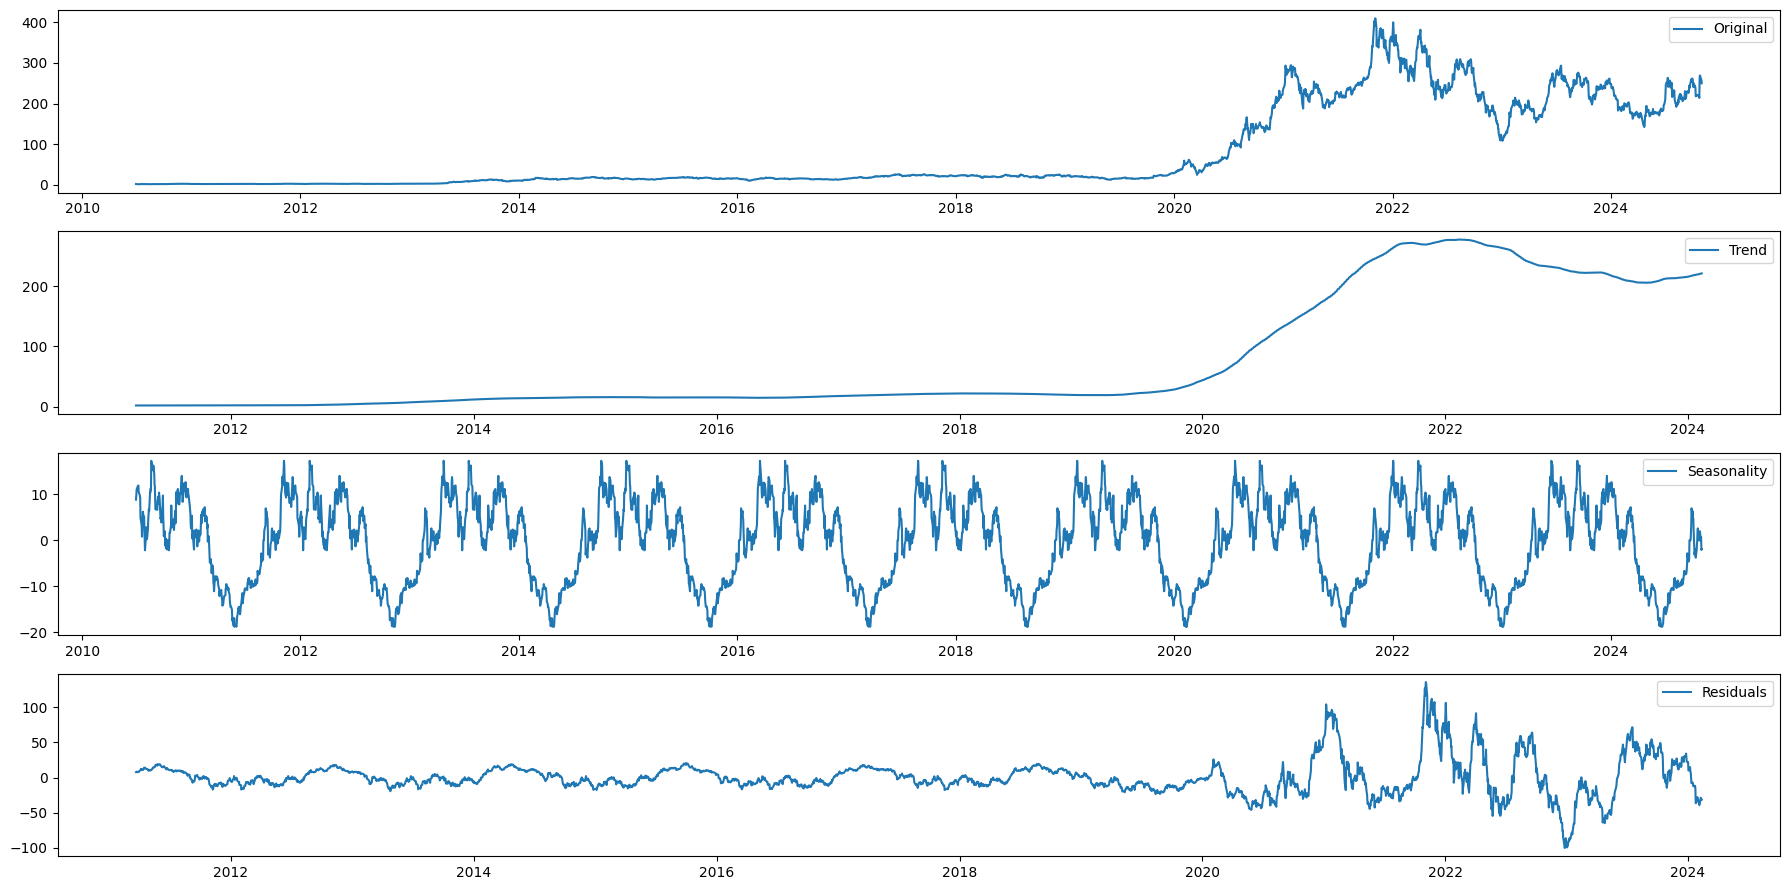

In [147]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
decomposition = seasonal_decompose(train_data["Adjusted Close"], model='additive',period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualize decomposition
plt.figure(figsize=(18,9))
plt.subplot(411)
plt.plot(train_data['Adjusted Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
stock='TSLA'
# Assume we have time series data for stock prices
# Use 'Adjusted Close' 
df_stock = pd.read_csv(f'./data/{stock}_weekly_adjusted.csv', header=0, index_col=0, parse_dates=[0], thousands=',')
ddf_stock=df_stock.sort_index(ascending=True,inplace=True)

ts = df_stock['Adjusted Close'].values

# Use the 'Adjusted Close' prices for analysis
ts = df_stock['Adjusted Close'].values

# Normalize the actual prices
scaler = MinMaxScaler()
ts = ts.reshape(-1, 1)  # Reshape for scaler
ts_scaled = scaler.fit_transform(ts)

# Define a function to create sequences of data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    dates=[]
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        dates.append(df_stock.index[i + time_step])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y),dates

# Set time step for LSTM
time_step = 10  # Number of previous days to use for predicting the next day
X, y,dates = create_dataset(ts_scaled, time_step)

# Reshape input for LSTM [samples, time steps, features]
# X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
ridge = Ridge(alpha=0.01)  # alpha is the regularization strength; higher alpha means stronger regularization

# Train the model
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# RidgeCV performs cross-validation to find the best alpha
alphas = np.logspace(-6, 6, 13)  # A range of alpha values to try
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model
ridge_cv.fit(X_train, y_train)

# Best alpha found via cross-validation
print(f'Best alpha: {ridge_cv.alpha_}')



Mean Squared Error: 0.0009277300330255327
Best alpha: 0.01


/Users/manikandanperumal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.



In [47]:
inp=pd.DataFrame(X.reshape(X.shape[0],X.shape[1]))
inp['y']=y
inp['predictions']=ridge.predict(X)
inp.tail()
inp_scaled=scaler.inverse_transform(inp)
# inp_scaled['date']=dates
ridge_df=pd.DataFrame(inp_scaled,columns=inp.columns)


In [48]:
df_stock.tail(20)

,Open,High,Low,Close,Adjusted Close,Volume
Date,,,,,,
2024-07-19,255.97,265.6000,236.83,239.20,239.20,587103140
2024-07-26,244.21,255.7594,214.71,219.80,219.80,576337172
2024-08-02,224.90,234.6800,205.78,207.67,207.67,464001152
2024-08-09,185.22,203.8799,182.00,200.00,200.00,368934704
2024-08-16,199.02,219.8000,194.67,216.12,216.12,389155956
2024-08-23,217.07,228.2200,210.32,220.32,220.32,381622057
2024-08-30,218.75,219.0900,202.59,214.11,214.11,311918353
2024-09-06,215.26,235.0000,209.64,210.73,210.73,388463568
2024-09-13,216.20,232.6700,213.67,230.29,230.29,361418443


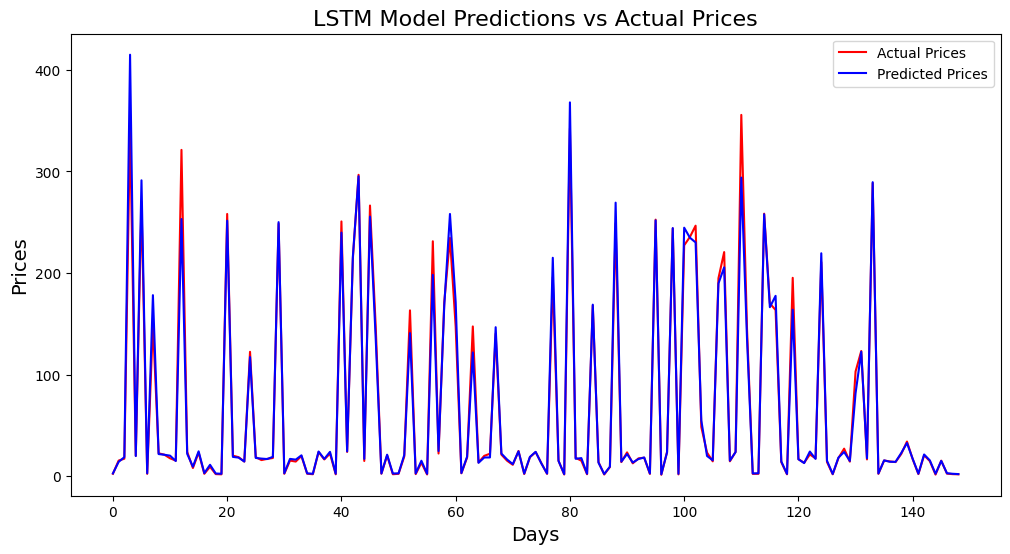

In [ ]:
# Make predictions
predictions = ridge.predict(X_test)

# Inverse transform to get the original scale for predicted prices
predictions = scaler.inverse_transform(predictions.reshape(1,-1)).reshape(-1,1)

# Inverse transform actual test prices
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Prices', color='red')
plt.plot(predictions, label='Predicted Prices', color='blue')
plt.title('LSTM Model Predictions vs Actual Prices', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.legend()
plt.show()

In [50]:
import plotly.express as px
import plotly.graph_objects as go

trace1 = go.Scatter(x=dates[-len(y_test_scaled):], y=y_test_scaled.reshape(1,-1)[0], mode='lines', name='Stock Price')
trace2 = go.Scatter(x=dates[-len(y_test_scaled):], y=predictions.reshape(1,-1)[0], mode='lines', name='predicted')

# Create the layout
layout = go.Layout(
    title='Stock Price and Prediction Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

# Create the figure with both traces
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()


In [51]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

X_in = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get the original scale for predicted prices
predictions_scaled = scaler.inverse_transform(predictions)

# Inverse transform actual test prices
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/100


/Users/manikandanperumal/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0639
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0064
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0044
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0030
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0041
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0032
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0029
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0032
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0032
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0022
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0027
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0021
E

In [52]:
inp=pd.DataFrame(X.reshape(X.shape[0],X.shape[1]))
inp['y']=y
inp['predictions']=model.predict(X)
inp.tail()
inp_scaled=scaler.inverse_transform(inp)
lstm_predictions=pd.DataFrame(inp_scaled,columns=inp.columns)
lstm_predictions['ridge_predictions']=ridge_df['predictions']
lstm_predictions.tail(20)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,0,1,2,3,4,5,6,7,8,9,y,predictions,ridge_predictions
722,168.47,177.46,179.24,178.08,177.48,178.01,183.01,197.88,251.52,248.23,239.20,255.796435,255.110317
723,177.46,179.24,178.08,177.48,178.01,183.01,197.88,251.52,248.23,239.20,219.80,242.208423,239.243155
724,179.24,178.08,177.48,178.01,183.01,197.88,251.52,248.23,239.20,219.80,207.67,217.630038,214.261288
725,178.08,177.48,178.01,183.01,197.88,251.52,248.23,239.20,219.80,207.67,200.00,201.732276,201.492550
726,177.48,178.01,183.01,197.88,251.52,248.23,239.20,219.80,207.67,200.00,216.12,194.315656,197.648047
727,178.01,183.01,197.88,251.52,248.23,239.20,219.80,207.67,200.00,216.12,220.32,209.882301,211.233084
728,183.01,197.88,251.52,248.23,239.20,219.80,207.67,200.00,216.12,220.32,214.11,219.837725,215.936836
729,197.88,251.52,248.23,239.20,219.80,207.67,200.00,216.12,220.32,214.11,210.73,216.125505,219.411680
730,251.52,248.23,239.20,219.80,207.67,200.00,216.12,220.32,214.11,210.73,230.29,211.271805,212.486100
731,248.23,239.20,219.80,207.67,200.00,216.12,220.32,214.11,210.73,230.29,238.25,227.347729,233.351600


In [55]:
df_stock.tail()

,Open,High,Low,Close,Adjusted Close,Volume
Date,,,,,,
2024-11-01,270.00,273.536,246.63,248.98,248.98,366288979
2024-11-08,244.56,328.710,238.88,321.22,321.22,625405564
2024-11-15,346.30,358.640,309.22,320.72,320.72,726819635
2024-11-22,340.73,361.530,330.01,352.56,352.56,428892998
2024-11-29,360.14,361.930,326.59,345.16,345.16,253250816


In [54]:
import plotly.express as px
import plotly.graph_objects as go

trace1 = go.Scatter(x=df_stock.index[time_step:], y=lstm_predictions['y'], mode='lines', name='Stock Price')
trace2 = go.Scatter(x=df_stock.index[time_step:], y=lstm_predictions['predictions'], mode='lines', name='predicted')
trace3 = go.Scatter(x=df_stock.index[time_step:], y=lstm_predictions['ridge_predictions'], mode='lines', name='ridge predicted')

# Create the layout
layout = go.Layout(
    title='Stock Price and Prediction Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

# Create the figure with both traces
fig = go.Figure(data=[trace1, trace2,trace3], layout=layout)

# Show the plot
fig.show()

In [ ]:
pd.DataFrame(inp_scaled,columns=inp.columns)

NameError: name 'accuracy' is not defined

In [ ]:

def accuracy(df_forecast, y_train_series, seasonallity):

    method = df_forecast.columns[1:]
    rmse_results = []
    mae_results = []
    mape_results = []
    mase_results = []

    y = df_forecast.y.values
    scale = np.abs(y_train_series[:-seasonallity] - y_train_series[seasonallity:])
    scale = np.average(scale)

    for i in method:

        y_hat = df_forecast[i].values
        d = y - y_hat
        mae_f = np.mean(abs(d))
        rmse_f = np.sqrt(np.mean(d**2))
        mape = np.mean(np.abs(d/y))*100
        mase = mae_f / scale
        mae_results.append(np.round(mae_f,2))
        rmse_results.append(np.round(rmse_f,2))
        mape_results.append(np.round(mape,2))
        mase_results.append(np.round(mase,2))

    accuracy_df = pd.DataFrame({'Method':method,
                    'RMSE':rmse_results,
                    'MAE':mae_results,
                    'MAPE':mape_results,
                    'MASE':mase_results})

    return accuracy_df

In [101]:
predictions_df=lstm_predictions[['y','predictions','ridge_predictions']]
predictions_df.columns
accuracy(predictions_df, lstm_predictions['y'].values, time_step)

,Method,RMSE,MAE,MAPE,MASE
0,predictions,11.57,6.54,37.27,0.38
1,ridge_predictions,10.99,5.30,9.57,0.31


In [90]:
# Create arrays with Close values: 
y_train_data = train_data["Gain Ratio Close"].values
y_test_data = test_data["Gain Ratio Close"].values

In [91]:
# Mean method:
model = HistoricAverage()
model = model.fit(y=y_train_data)
mean = model.predict(h=len(y_test_data))

# Naive method:
model = Naive()
model = model.fit(y=y_train_data)
naive = model.predict(h=len(y_test_data))

# Drift method:
model = RandomWalkWithDrift()
model = model.fit(y=y_train_data)
drift = model.predict(h=len(y_test_data))



# print("Mean method:",mean,"\n\nNaive method:",naive,"\n\nDrift method:",drift)

In [92]:
model= ARIMA(order=(5,0,2))
model = model.fit(y=y_train_data)
arima = model.predict(h=len(y_test_data))

In [95]:
# Specify the quarters predicted:
date_pred = test_data.index

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'Date':date_pred,
                        'obs_values':y_test_data,
                        'mean_forecast':mean["mean"],
                        'naive_forecast':naive["mean"],
                        'drift_forecast':drift["mean"],
                         'arima_forecast': arima['mean']})    

In [ ]:
Y_pred_df.set_index('Date',inplace=True)

,obs_values,mean_forecast,naive_forecast,drift_forecast,arima_forecast
Date,,,,,
2023-01-03,0.010932,0.000676,-0.002473,-0.002476,0.003450
2023-01-04,-0.011037,0.000676,-0.002473,-0.002478,0.000512
2023-01-05,-0.021869,0.000676,-0.002473,-0.002480,0.000921
2023-01-06,0.016019,0.000676,-0.002473,-0.002483,0.002021
2023-01-09,0.007260,0.000676,-0.002473,-0.002485,0.000704
...,...,...,...,...,...
2024-11-08,-0.013276,0.000676,-0.002473,-0.003577,0.000685
2024-11-11,0.011731,0.000676,-0.002473,-0.003579,0.000685
2024-11-12,0.007419,0.000676,-0.002473,-0.003582,0.000685


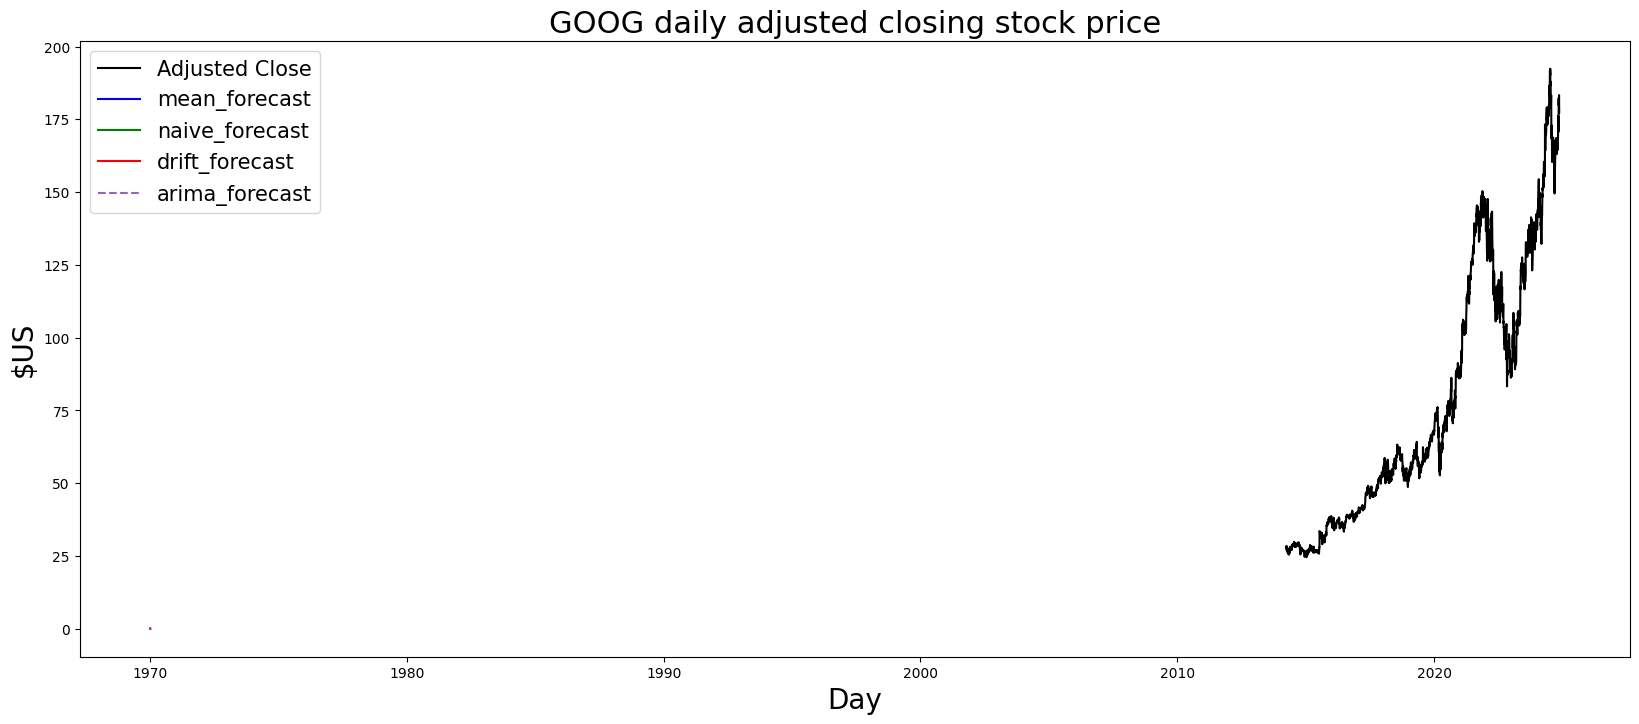

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([stock_data, Y_pred_df])#.set_index('Date')
plt.plot(plot_df['Adjusted Close'], 'k-', plot_df['mean_forecast'], 'b-', plot_df['naive_forecast'], 'g-', plot_df['drift_forecast'], 'r-',plot_df['arima_forecast'],'C4--')

# Specify graph features:
ax.set_title(f'{stock} daily adjusted closing stock price', fontsize=22)
ax.set_ylabel('$US', fontsize=20)
ax.set_xlabel('Day', fontsize=20)
# x_ticks = np.arange(0, len(plot_df), 200)
# ax.set_xticks(x_ticks)
ax.legend(['Adjusted Close', 'mean_forecast', 'naive_forecast', 'drift_forecast','arima_forecast'], prop={'size': 15})

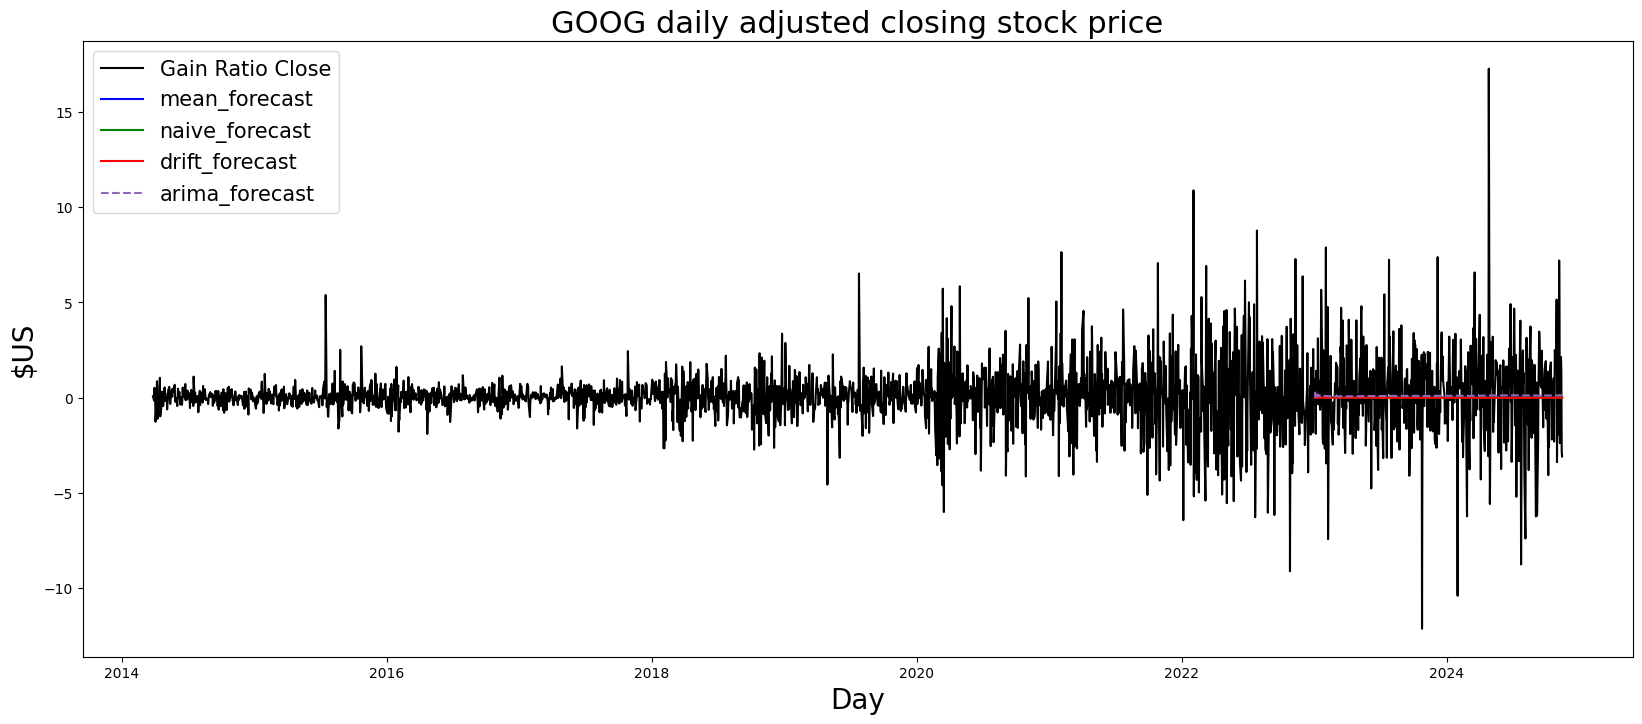

In [127]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df =pd.merge(stock_data.reset_index(), Y_pred_df,left_on=['Date'],right_on=['Date'],how='left').set_index('Date')
plt.plot(plot_df['Gain Ratio Close']*plot_df['Adjusted Close'], 'k-', plot_df['mean_forecast'], 'b-', plot_df['naive_forecast'], 'g-', plot_df['drift_forecast'], 'r-',plot_df['arima_forecast']*plot_df['Adjusted Close'],'C4--')

# Specify graph features:
ax.set_title(f'{stock} daily adjusted closing stock price', fontsize=22)
ax.set_ylabel('$US', fontsize=20)
ax.set_xlabel('Day', fontsize=20)
# x_ticks = np.arange(0, len(plot_df), 200)
# ax.set_xticks(x_ticks)
ax.legend(['Gain Ratio Close', 'mean_forecast', 'naive_forecast', 'drift_forecast','arima_forecast'], prop={'size': 15})

In [129]:
plot_df['Gain Ratio Close']*plot_df['Adjusted Close'] + plot_df['Adjusted Close'] 

Date
2014-03-28     28.006997
2014-03-31     27.630033
2014-04-01     28.805635
2014-04-02     28.272134
2014-04-03     28.554097
                 ...    
2024-11-08    177.472129
2024-11-11    184.104753
2024-11-12    184.680015
2024-11-13    177.703688
2024-11-14    174.264627
Length: 2678, dtype: float64

,Date,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,lag 1 Adjusted Close,lag 1 Volume,Gain Ratio Close,Gain Ratio Volume,Gain Ratio Combined,obs_values,mean_forecast,naive_forecast,drift_forecast,arima_forecast
0,2014-03-28,561.200,566.430,558.67,559.99,27.930477,41100,0.0,1.0,27.854165,13100.0,0.002740,2.137405,0.005856,NaN,NaN,NaN,NaN,NaN
1,2014-03-31,566.890,567.000,556.93,556.97,27.779849,10800,0.0,1.0,27.930477,41100.0,-0.005393,-0.737226,0.003976,NaN,NaN,NaN,NaN,NaN
2,2014-04-01,558.710,568.450,558.71,567.16,28.288093,7900,0.0,1.0,27.779849,10800.0,0.018295,-0.268519,-0.004913,NaN,NaN,NaN,NaN,NaN
3,2014-04-02,565.106,604.830,562.19,567.00,28.280112,146700,0.0,1.0,28.288093,7900.0,-0.000282,17.569620,-0.004957,NaN,NaN,NaN,NaN,NaN
4,2014-04-03,569.850,587.280,564.13,569.74,28.416775,5085200,0.0,1.0,28.280112,146700.0,0.004832,33.663940,0.162679,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2024-11-08,182.000,182.350,179.57,179.86,179.860000,15021549,0.0,1.0,182.280000,16730407.0,-0.013276,-0.102141,0.001356,-0.013276,0.000676,-0.002473,-0.003577,0.000685
2674,2024-11-11,180.070,182.085,179.99,181.97,181.970000,12503422,0.0,1.0,179.860000,15021549.0,0.011731,-0.167634,-0.001967,0.011731,0.000676,-0.002473,-0.003579,0.000685
2675,2024-11-12,181.380,184.025,180.99,183.32,183.320000,14065845,0.0,1.0,181.970000,12503422.0,0.007419,0.124960,0.000927,0.007419,0.000676,-0.002473,-0.003582,0.000685
2676,2024-11-13,182.150,182.615,180.12,180.49,180.490000,13969709,0.0,1.0,183.320000,14065845.0,-0.015437,-0.006835,0.000106,-0.015437,0.000676,-0.002473,-0.003584,0.000685


In [118]:
Y_pred_df.set_index('Date')

,obs_values,mean_forecast,naive_forecast,drift_forecast,arima_forecast
Date,,,,,
2023-01-03,0.010932,0.000676,-0.002473,-0.002476,0.003450
2023-01-04,-0.011037,0.000676,-0.002473,-0.002478,0.000512
2023-01-05,-0.021869,0.000676,-0.002473,-0.002480,0.000921
2023-01-06,0.016019,0.000676,-0.002473,-0.002483,0.002021
2023-01-09,0.007260,0.000676,-0.002473,-0.002485,0.000704
...,...,...,...,...,...
2024-11-08,-0.013276,0.000676,-0.002473,-0.003577,0.000685
2024-11-11,0.011731,0.000676,-0.002473,-0.003579,0.000685
2024-11-12,0.007419,0.000676,-0.002473,-0.003582,0.000685


In [119]:
pd.concat([stock_data.reset_index(),Y_pred_df])

,Date,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,lag 1 Adjusted Close,lag 1 Volume,Gain Ratio Close,Gain Ratio Volume,Gain Ratio Combined,obs_values,mean_forecast,naive_forecast,drift_forecast,arima_forecast
0,2014-03-28,561.200,566.43,558.67,559.99,27.930477,41100.0,0.0,1.0,27.854165,13100.0,0.002740,2.137405,0.005856,NaN,NaN,NaN,NaN,NaN
1,2014-03-31,566.890,567.00,556.93,556.97,27.779849,10800.0,0.0,1.0,27.930477,41100.0,-0.005393,-0.737226,0.003976,NaN,NaN,NaN,NaN,NaN
2,2014-04-01,558.710,568.45,558.71,567.16,28.288093,7900.0,0.0,1.0,27.779849,10800.0,0.018295,-0.268519,-0.004913,NaN,NaN,NaN,NaN,NaN
3,2014-04-02,565.106,604.83,562.19,567.00,28.280112,146700.0,0.0,1.0,28.288093,7900.0,-0.000282,17.569620,-0.004957,NaN,NaN,NaN,NaN,NaN
4,2014-04-03,569.850,587.28,564.13,569.74,28.416775,5085200.0,0.0,1.0,28.280112,146700.0,0.004832,33.663940,0.162679,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2024-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013276,0.000676,-0.002473,-0.003577,0.000685
467,2024-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011731,0.000676,-0.002473,-0.003579,0.000685
468,2024-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007419,0.000676,-0.002473,-0.003582,0.000685
469,2024-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015437,0.000676,-0.002473,-0.003584,0.000685


In [110]:
stock_data.join(Y_pred_df)

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,lag 1 Adjusted Close,lag 1 Volume,Gain Ratio Close,Gain Ratio Volume,Gain Ratio Combined,Date,obs_values,mean_forecast,naive_forecast,drift_forecast,arima_forecast
Date,,,,,,,,,,,,,,,,,,,
2014-03-28 00:00:00,561.200,566.430,558.67,559.99,27.930477,41100,0.0,1.0,27.854165,13100.0,0.002740,2.137405,0.005856,NaT,NaN,NaN,NaN,NaN,NaN
2014-03-31 00:00:00,566.890,567.000,556.93,556.97,27.779849,10800,0.0,1.0,27.930477,41100.0,-0.005393,-0.737226,0.003976,NaT,NaN,NaN,NaN,NaN,NaN
2014-04-01 00:00:00,558.710,568.450,558.71,567.16,28.288093,7900,0.0,1.0,27.779849,10800.0,0.018295,-0.268519,-0.004913,NaT,NaN,NaN,NaN,NaN,NaN
2014-04-02 00:00:00,565.106,604.830,562.19,567.00,28.280112,146700,0.0,1.0,28.288093,7900.0,-0.000282,17.569620,-0.004957,NaT,NaN,NaN,NaN,NaN,NaN
2014-04-03 00:00:00,569.850,587.280,564.13,569.74,28.416775,5085200,0.0,1.0,28.280112,146700.0,0.004832,33.663940,0.162679,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08 00:00:00,182.000,182.350,179.57,179.86,179.860000,15021549,0.0,1.0,182.280000,16730407.0,-0.013276,-0.102141,0.001356,NaT,NaN,NaN,NaN,NaN,NaN
2024-11-11 00:00:00,180.070,182.085,179.99,181.97,181.970000,12503422,0.0,1.0,179.860000,15021549.0,0.011731,-0.167634,-0.001967,NaT,NaN,NaN,NaN,NaN,NaN
2024-11-12 00:00:00,181.380,184.025,180.99,183.32,183.320000,14065845,0.0,1.0,181.970000,12503422.0,0.007419,0.124960,0.000927,NaT,NaN,NaN,NaN,NaN,NaN


In [27]:
accuracy(Y_pred_df, y_test_data, 1)

,Method,RMSE,MAE,MAPE,MASE
0,mean_forecast,79.89,75.37,52.16,41.98
1,naive_forecast,57.54,51.08,34.07,28.45
2,drift_forecast,50.18,44.60,29.77,24.84
